In [2]:
#import libraries
import numpy as np
import math
from operator import itemgetter
import random
from matplotlib import pyplot as plt

# params
nd = 10             # num of trials
nmax = 100          # num of epochs
N = 20              # num of features
a_incr = 100         # num of alpha increments
a_start = 0.1       # alpha starting number
a_end = 10          # alpha ending number

# constants
alphas = np.linspace(a_start, a_end, a_incr)
noise_levels = np.linspace(0, 1, 10)

# Minover algorithm
def minover(P, N, nmax, noise):
    """
    Runs the minover algorithm.

    P = amount of samples
    N = amount of features
    nmax = max number of epochs
    noise = probability of distorting true labels
    """
    #prepare all vectors
    mu, sigma = 0, 1
    xi = np.random.normal(mu, sigma, [P, N])  #initial values
    w_t = np.random.normal(
        mu, sigma,
        N)  #initial weights, teacher weights, have to be random not just '1'
    w_t = w_t * np.sqrt(N) / np.linalg.norm(w_t, 2)
    S = np.sign(np.dot(xi, w_t))  #initial labels (teacher weights),
    if noise > 0.0:
        n_S_true = np.size(np.where(S > 0))  # amount of true labels
        # new label for every true label based on noise probability
        S_true_noised = np.random.choice([+1, -1],
                                         n_S_true,
                                         p=[1 - noise, noise])
        # replace true labels with their newly generated ones.
        np.place(S, S > 0, S_true_noised)

    #they are the products of weights and xi vector
    w = np.zeros(N)  #learned weights (students weights)

    converge = 0  # check convergence
    initial_lowest_stab = 0  # initial κν; t=0

    for i in range(nmax):  # actual algorithm starts here
        data = []

        #calculate κν(t)
        for mu_t in range(P):
            current_example = xi[mu_t]
            e_mu_t = np.dot(np.dot(current_example, w), S[mu_t])
            data.append([e_mu_t, xi[mu_t], S[mu_t]])

        #determine the minimal stability
        data = sorted(data, key=itemgetter(0), reverse=False)
        lowest_stab = data[0][0]

        #determine the sample with minimal stability and its label
        min_data = data[0][1]
        min_label = data[0][2]

        #hebbian update
        w = w + (min_data * min_label) / N

        if lowest_stab >= initial_lowest_stab:  #if the algorithm found the larger distance
            initial_lowest_stab = lowest_stab
            converge = 0  #then the algorithm converges
        else:  #if the distance with the new example that the algorithm found is larger the one that we already have
            converge = converge + 1  #then increase counter by 1
            if converge >= P:  #once it reaches threshold (larger than P as it is stated in the assignment)
                break  #stop the algorithm

    #calculate the error
    error = 1 / np.pi * math.acos(
        (np.dot(w, w_t)) / (np.linalg.norm(w, 2) * np.linalg.norm(w_t, 2)))
    return error


def experiment_and_validate(alg_func, nd, parameters):
    """
    Validates an experiment by running it nd times, and taking the average result.

    `alg_func` should be a function returning some error rate as a double.
    """

    sum_errors = [] # compute generalization error
    for j in range(nd):
        error = alg_func(*parameters)
        sum_errors.append(error)

    return np.mean(sum_errors)


def run_experiment(noise):
    av_errors = []  # average generalization errors
    for alpha in alphas:
        P = int(alpha * N)  #num of samples
        av_error = experiment_and_validate(minover, nd, (P, N, nmax, noise))
        av_errors.append(av_error)
        print('\t[alpha = {:.2f}] average rate: {:.2f}'.format(alpha, av_error))
    return av_errors

# Run Minover
for noise in noise_levels:
    print('noise = {:.2f}'.format(noise))
    av_errors = run_experiment(noise)  # average generalization errors
    plt.plot(alphas, av_errors, label='noise = {:.2f}'.format(noise))

plt.ylabel('Generalization error')
plt.xlabel('alpha')
plt.title('Generalization error Minover perceptron')
plt.legend()
plt.show()

alpha:
0.1
av error:
0.4480241251676048


alpha:
0.2
av error:
0.3922262583190172


alpha:
0.30000000000000004
av error:
0.37057834274445595


alpha:
0.4
av error:
0.3657619352711249


alpha:
0.5
av error:
0.3159812448026572


alpha:
0.6
av error:
0.3382019927361893


alpha:
0.7000000000000001
av error:
0.2942935772875919


alpha:
0.8
av error:
0.2889232060342506


alpha:
0.9
av error:
0.274924894247048


alpha:
1.0
av error:
0.2558499925683243


alpha:
1.1
av error:
0.2468704480850096


alpha:
1.2000000000000002
av error:
0.24065193894314954


alpha:
1.3000000000000003
av error:
0.21444683169311368


alpha:
1.4000000000000001
av error:
0.22474287568714152


alpha:
1.5000000000000002
av error:
0.22108130060778453


alpha:
1.6
av error:
0.21827199084939766


alpha:
1.7000000000000002
av error:
0.22643318200607704


alpha:
1.8000000000000003
av error:
0.1836472214573013


alpha:
1.9000000000000001
av error:
0.19422469162979403


alpha:
2.0
av error:
0.18758827297369293


alpha:
2.1
av er

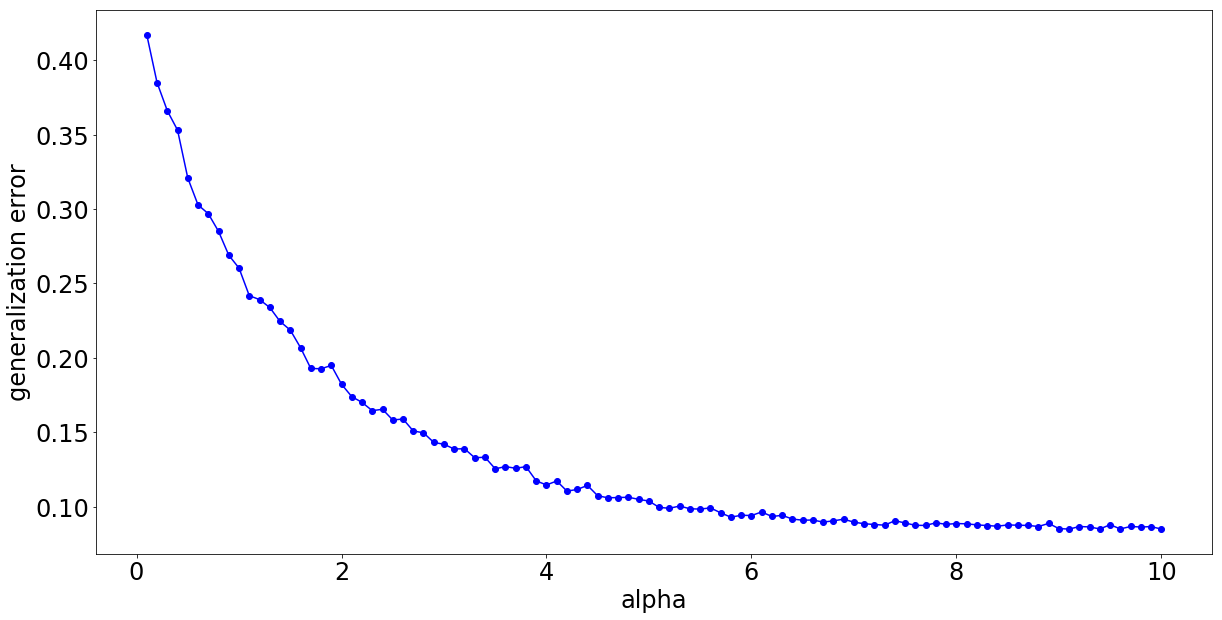

In [2]:
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 24})
plt.plot(alphas, av_errors, marker='o', linestyle='-', color='b')
plt.xlabel('alpha')
plt.ylabel('generalization error')
plt.show()